In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [12]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


c:\users\genta\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by the scale function.
  # This is added back by InteractiveShellApp.init_path()


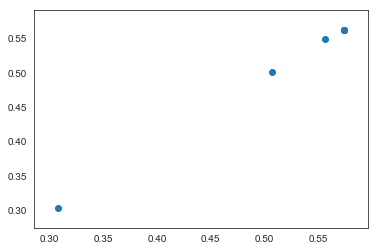

In [14]:
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.5)
lassBig.fit(X_train2, Y_train)

#lasso
ls1 = lassBig.score(X_train2, Y_train)

lassmed = linear_model.Lasso(alpha=.25)
lassmed.fit(X_train2, Y_train)

ls2= lassmed.score(X_train2, Y_train)

lasssm = linear_model.Lasso(alpha=.125)
lasssm.fit(X_train2, Y_train)

ls3=lasssm.score(X_train2, Y_train)


ls4 = lassBig.score(X_test2, Y_test)
ls5 = lassmed.score(X_test2, Y_test)
ls6= lasssm.score(X_test2, Y_test)

#ridge
ridgeBig=linear_model.Ridge(alpha=.5)
ridgeBig.fit(X_train2, Y_train)
rd1 = ridgeBig.score(X_train2, Y_train)

ridgeMed=linear_model.Ridge(alpha=.25)
ridgeMed.fit(X_train2, Y_train)
rd2 = ridgeMed.score(X_train2, Y_train)

ridgesm=linear_model.Ridge(alpha=.125)
ridgesm.fit(X_train2, Y_train)
rd3 = ridgesm.score(X_train2, Y_train)

rd4= ridgeBig.score(X_test2, Y_test)
rd5= ridgeMed.score(X_test2, Y_test)
rd6= ridgesm.score(X_test2, Y_test)

    



x= ls1, ls2, ls3, rd1, rd2, rd3
y= ls4, ls5, ls6, rd4, rd5, rd6


plt.scatter(x,y)


In [20]:
#r2 scores
print('Lasso Scores')
print('Lasso Big Train Score:', ls1)
print('Lasso Med Train Score:', ls2)
print('Lasso Small Train Score:', ls3)
print('Lasso Big Test Score:', ls4)
print('Lasso Med Test Score:', ls5)
print('Lasso Small Test Score:', ls6)
print('')


print('Ridge Scores:')
print('Ridge Big Train Score:', rd1)
print('Ridge Med Train Score:',rd2)
print('Ridge Small Train Score:',rd3)
print('Ridge Big Test Score:',rd4)
print('Ridge Med Test Score:',rd5)
print('Ridge Small Test Score:',rd6)


Lasso Scores
Lasso Big Train Score: 0.30824960733096385
Lasso Med Train Score: 0.5073444290020297
Lasso Small Train Score: 0.5571168470040088
Lasso Big Test Score: 0.30273308882996774
Lasso Med Test Score: 0.5010305901413674
Lasso Small Test Score: 0.54913450708478

Ridge Scores:
Ridge Big Train Score: 0.5739723094974005
Ridge Med Train Score: 0.5739723143241755
Ridge Small Train Score: 0.5739723156070178
Ridge Big Test Score: 0.5630009659828344
Ridge Med Test Score: 0.5630000523604941
Ridge Small Test Score: 0.5629995948842128


Do lasso and ridge yield the same  R2R2  for a given lambda value? They vary only slightly. 